<a href="https://colab.research.google.com/github/AKSHTMISHRA/DATA-VISUALISATIONS/blob/main/Worldcovid_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing the files from native desktop
from google.colab import files
uploaded=files.upload()


Saving covid19_world.csv to covid19_world.csv


In [33]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import dates


In [4]:
data=pd.read_csv("covid19_world.csv")


In [5]:
data.head()

,ObservationDate,Country_Region,Province_State,Confirmed,Deaths,Recovered,Active
0,2020-01-22,China,Anhui,1,0.0,0.0,0.0
1,2020-01-22,China,Beijing,14,0.0,0.0,0.0
2,2020-01-22,China,Chongqing,6,0.0,0.0,0.0
3,2020-01-22,China,Fujian,1,0.0,0.0,0.0
4,2020-01-22,China,Gansu,0,0.0,0.0,0.0


In [6]:
data.isnull().sum()

ObservationDate        0
Country_Region         1
Province_State     51622
Confirmed              0
Deaths                 1
Recovered              2
Active               484
dtype: int64

In [7]:
data.describe()

,Confirmed,Deaths,Recovered,Active
count,1.058552e+06,1.058551e+06,1.058550e+06,1.058068e+06
mean,7.117281e+03,2.080916e+02,4.421706e+03,2.480877e+03
std,4.854749e+04,1.534979e+03,5.494809e+04,4.766263e+04
min,-3.028440e+05,-1.780000e+02,-8.544050e+05,-6.298082e+06
25%,4.100000e+01,0.000000e+00,0.000000e+00,3.200000e+01
50%,3.020000e+02,5.000000e+00,0.000000e+00,2.470000e+02
75%,1.585000e+03,3.300000e+01,0.000000e+00,1.199000e+03
max,2.616902e+06,6.426700e+04,6.399531e+06,2.382209e+06


In [8]:
#removing the column with maximum NULL value 
data.drop(['Province_State'],axis=1,inplace=True)
#error because its already been deleted 


In [9]:
#checking whether the column is deleted? 
data.columns


Index(['ObservationDate', 'Country_Region', 'Confirmed', 'Deaths', 'Recovered',
       'Active'],
      dtype='object')

In [16]:
data.head()


,ObservationDate,Country_Region,Confirmed,Deaths,Recovered,Active
0,2020-01-22,China,1,0.0,0.0,0.0
1,2020-01-22,China,14,0.0,0.0,0.0
2,2020-01-22,China,6,0.0,0.0,0.0
3,2020-01-22,China,1,0.0,0.0,0.0
4,2020-01-22,China,0,0.0,0.0,0.0


**VISUALISATION STARTS** 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

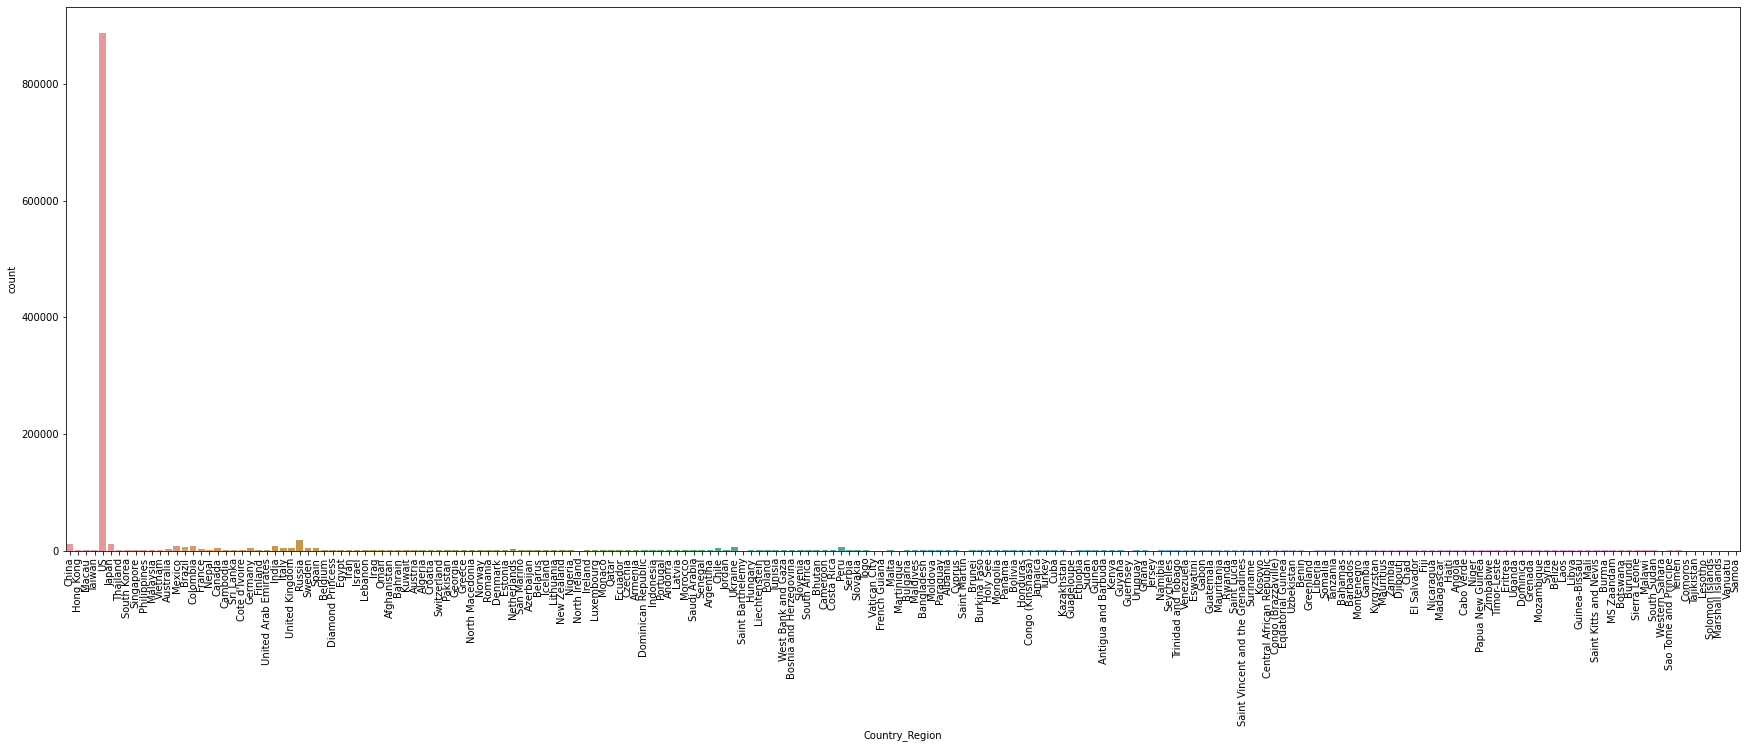

In [18]:
#total confirmed CASES by country
plt.figure(figsize=(30,10))
ax=sns.countplot(data['Country_Region'])
plt.xticks(rotation=90)


In [30]:
data.columns

Index(['ObservationDate', 'Country_Region', 'Confirmed', 'Deaths', 'Recovered',
       'Active'],
      dtype='object')

In [37]:
def set_subplot_style(*args, **kwargs):

    # get the current Axes object
    ax = plt.gca()

    # just show year in x axis labels
    hfmt = dates.DateFormatter('%Y')

    # we just want ticks and labels at every second year
    ax.xaxis.set_major_locator(dates.YearLocator(2))

    ax.xaxis.set_major_formatter(hfmt)

    # rotate x tick labels
    ax.tick_params(axis='x', labelrotation=90)

    # draw y=0 axis (de-emphised)
    ax.axhline(0, color='grey', alpha=0.5)

    # draw grid from  y axis only
    ax.grid(axis='y', which='major', alpha=0.5)

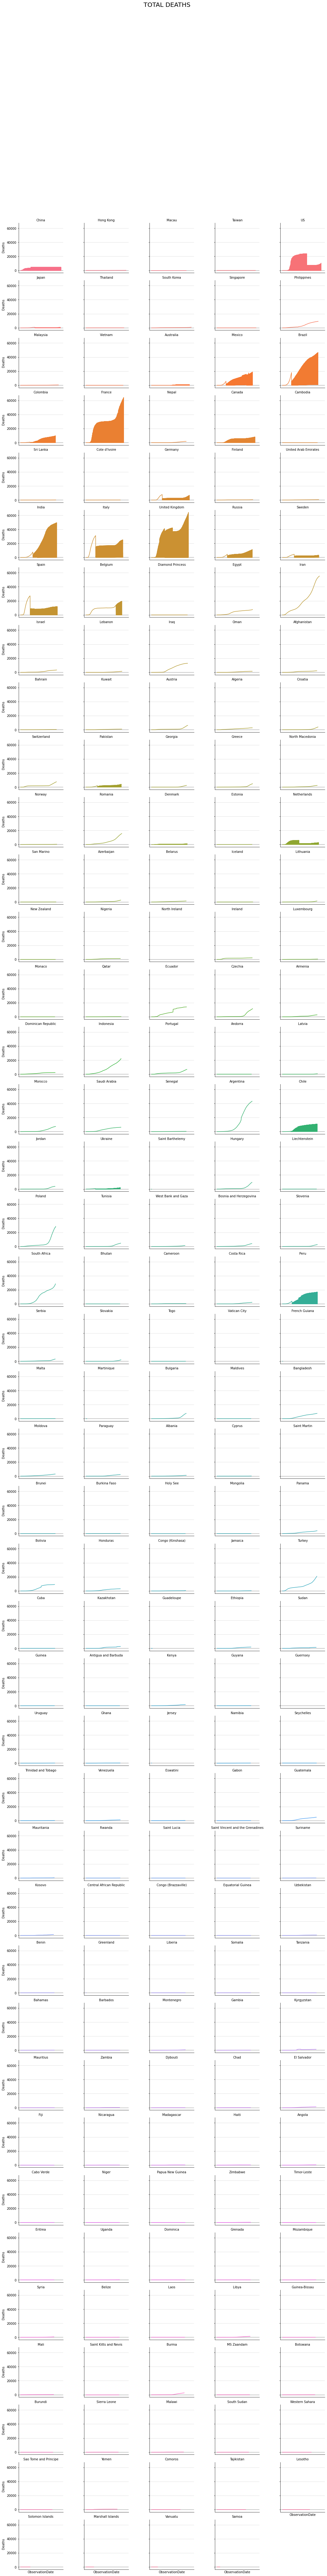

In [39]:
#total DEATHS by country


grid = sns.FacetGrid(
    data,
    col='Country_Region',
    hue='Country_Region',
    col_wrap=5,
    height=3,
)

# set our style for each subplot
grid.map(set_subplot_style)

# plot data in each subplot
grid.map(plt.plot, 'ObservationDate', 'Deaths')

# set subplot title to be country name
grid.set_titles('{col_name}')

# rename all x and y axis labels
grid.set_xlabels('ObservationDate')
grid.set_ylabels(' Deaths')

# put on a big Figure title, then  make room for it (need top 10%)
grid.fig.suptitle(
    'TOTAL DEATHS\n',
    size=20,
)
grid.fig.subplots_adjust(top=0.9, bottom=0.05)
